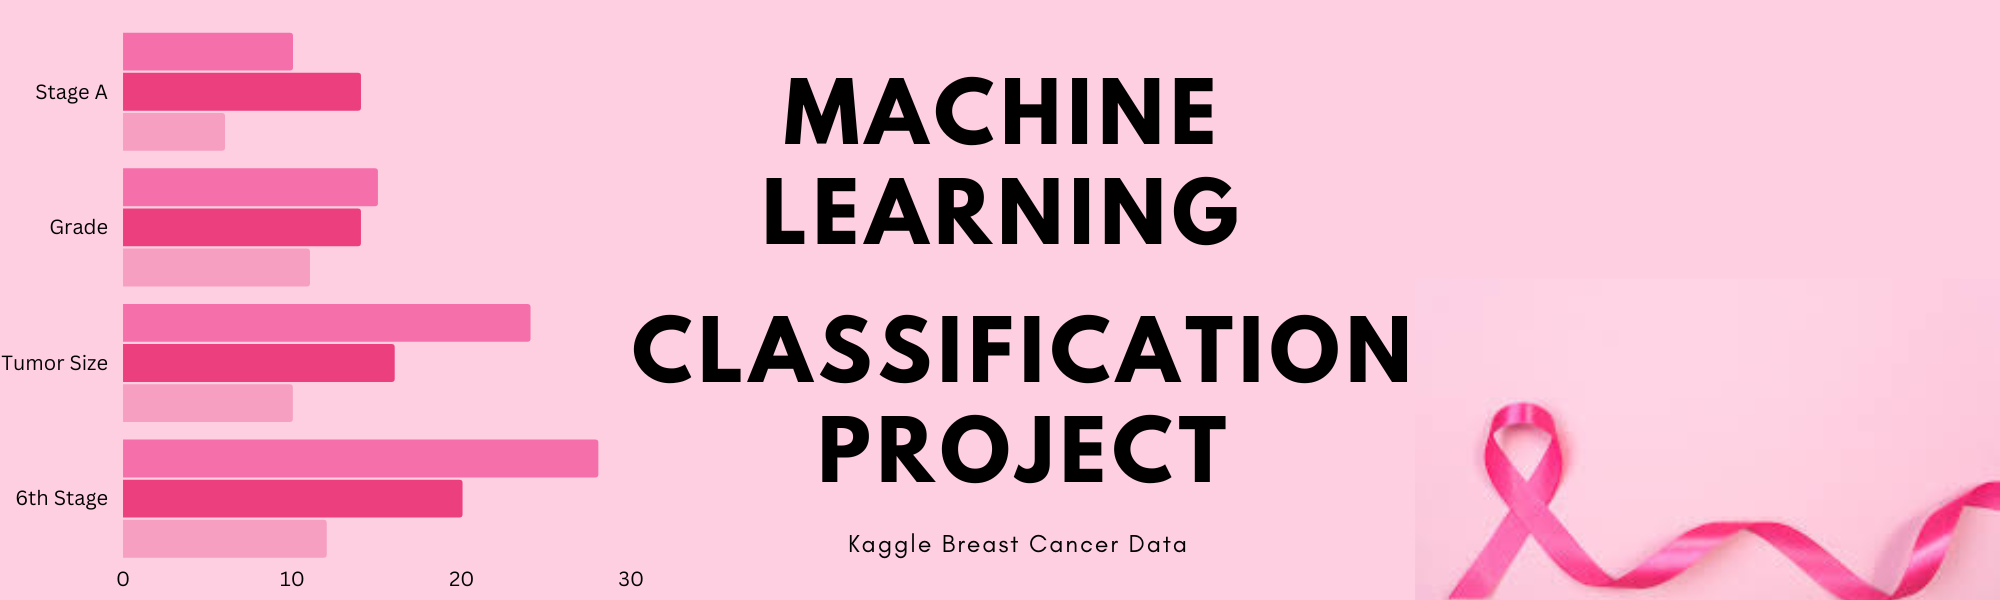

# <center><b>Predicitng the Grade</b></center>


<span style="color:pink">In this Notebook I will use a variety of models to predcit the grade of the patient. <br>
* In the original data the grade column is ordinal from 1 to 4.<br>
* the eda shows that imblanced, high volume of grade number 2 with less 1 and 3. also, a very mninmal amount of 4's.
* I will use be using a data auggmentation method called: SMOTE to syntheticly oversampled classes 1 & 3
* after consideration and to avoid overfitting, we will not try to predict grade 4 and will delete the patients with this grade from our data.
 </br></span>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

# Import data

In [2]:
df = pd.read_csv('Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


<span style="color:pink">due to low amount of data, we will not be spliting into test & train. instead we will relay on the crossvalidation resuls as a reassurance we wont overfitting.
 </br></span>

# Feature Engineering

<span style="color:pink">apply all of the function transformers from our EDA
 </br></span>

In [4]:
from cancer_func import cancer_encode
from cancer_func import cancer_features_select

In [5]:
cancer_encoder = FunctionTransformer(cancer_encode, validate=False)
cancer_features_selector = FunctionTransformer(cancer_features_select, validate=False)

In [6]:
df = cancer_encode(df)
df = cancer_features_select(df)
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,Regional_Node_pos_%
0,68,0.0,0.0,0.0,3.0,0.0,4,1.0,1.0,24,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.166667
1,50,1.0,1.0,2.0,2.0,0.0,35,1.0,1.0,14,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,35.714286
2,58,2.0,2.0,4.0,2.0,0.0,63,1.0,1.0,14,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,50.000000
3,58,0.0,0.0,0.0,3.0,0.0,18,1.0,1.0,2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.000000
4,47,1.0,0.0,1.0,3.0,0.0,41,1.0,1.0,3,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,33.333333


<span style="color:pink">We created custom in project functions to encode the categorical columns and normalize the data
 </br></span>

In [7]:
#install imbalanced-learn libary
# %pip install imbalanced-learn

In [8]:
#split to train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Summary of the target variable distribution

<span style="color:pink">as mentioned in the beginning, grade's classes are imbalanced, therfore we will drop grade 3 and over sample grades 0 & 2
 </br></span>


In [9]:
#delete class 3
df = df[df.Grade != 3]
#split to x and y
X = df.drop('Grade', axis=1)
y= df['Grade']
y=LabelEncoder().fit_transform(y)

In [10]:
#summarize the distribution
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=2351, Percentage=80.707%
Class=0, Count=543, Percentage=18.641%
Class=2, Count=19, Percentage=0.652%


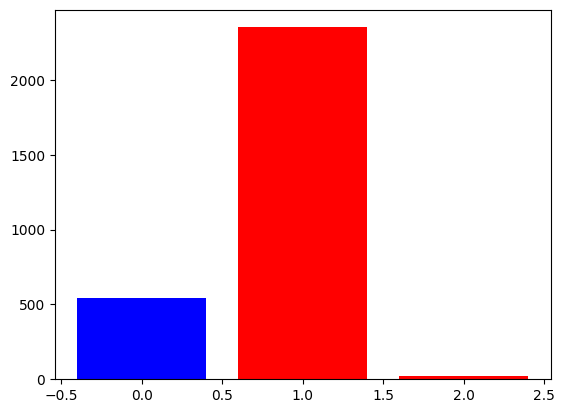

In [11]:
#plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.show()

## Oversampling

Class=1, Count=2351, Percentage=33.333%
Class=0, Count=2351, Percentage=33.333%
Class=2, Count=2351, Percentage=33.333%


<BarContainer object of 3 artists>

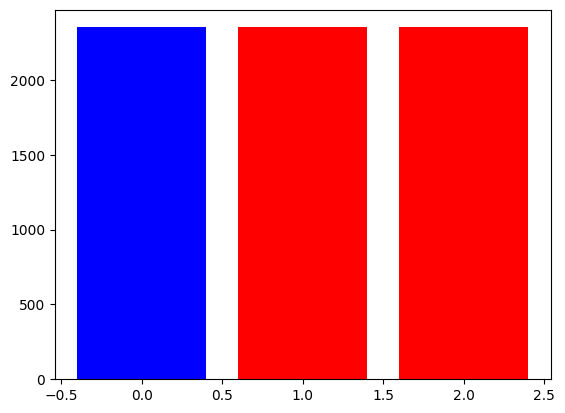

In [12]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#plot the distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per)) 
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])

<span style="color:pink">now that our data is balanced, we can start to train our model</br></span>

## Model 1 - Logistic Regression

In [13]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Tumor Size', ylabel='Regional_Node_pos_%'>

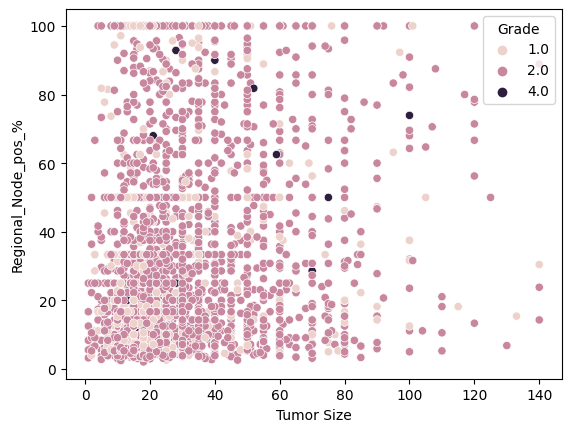

In [14]:
sns.scatterplot(x='Tumor Size', y='Regional_Node_pos_%', hue='Grade', data=df)

### Initiate the model the Model

In [15]:
grade_lr = LogisticRegression()


### design the pipeline

In [16]:
over = SMOTE()
scaler = StandardScaler() 
grade_lr = LogisticRegression()
log_steps = [("scaler", scaler), ("over", over), ("logistic", grade_lr)]

pipe_log = Pipeline(steps=log_steps)

param_grid_log = {
    "over__k_neighbors": [5,6,7,8],
    "logistic__C": [1,4],
    "logistic__class_weight":[{0: 1, 1: 1},{0: 1, 1: 2},{0: 1, 1: 3},{0: 1, 1: 10}]
}


### GridSearch & Fit the Model

In [17]:

search = GridSearchCV(pipe_log, param_grid_log, n_jobs=5,scoring='f1')
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

Best parameter (CV score=nan):
{'logistic__C': 1, 'logistic__class_weight': {0: 1, 1: 1}, 'over__k_neighbors': 5}


### Cross Validation and evaluation

In [20]:
K = 7
scores = cross_val_score(grade_lr, X, y, cv=K)

print("scores: " + (K * "{:.3f} ").format(*scores))

scores: 0.516 0.557 0.531 0.585 0.552 0.576 0.534 


## Model 2 - Random Forest 